### 1. Importing And Loading Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score,max_error
warnings.filterwarnings('ignore')

# Loading and copying dataset
df_og=pd.read_csv("StudentPerformanceFactors.csv",encoding='utf-8')
df=df_og.copy()
df.reset_index(drop=True,inplace=True)
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Step2- Cleaning Data and Preparation


In [2]:
# Numeric and string columns
numeric_columns =['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']
string_columns =['Parental_Involvement','Access_to_Resources','Extracurricular_Activities','Motivation_Level',
                  'Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence',
                  'Learning_Disabilities','Parental_Education_Level','Distance_from_Home','Gender']

# Filling  missing numeric with mean
df[numeric_columns]=df[numeric_columns].apply(lambda x:x.fillna(x.mean()))
df[string_columns] = df[string_columns].apply(lambda x:x.fillna(x.mode()[0]))

# Encoding ordinal categorical columns
ord_cols =['Family_Income','Teacher_Quality','Parental_Involvement','Motivation_Level']
encoder=OrdinalEncoder(categories=[['Low','Medium','High']]*len(ord_cols))
df[ord_cols]=encoder.fit_transform(df[ord_cols])

# Binary encodingGender and Participation
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Extracurricular_Activities']=df['Extracurricular_Activities'].map({'Yes':1,'No':0})
df['Internet_Access']=df['Internet_Access'].map({'Yes':1,'No':0})
df['Learning_Disabilities']=df['Learning_Disabilities'].map({'Yes':1,'No':0})

# Showing only top 5 rows
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.0,High,0,7,73,0.0,1,0,0.0,1.0,Public,Positive,3,0,High School,Near,1,67
1,19,64,0.0,Medium,0,8,59,0.0,1,2,1.0,1.0,Public,Negative,4,0,College,Moderate,0,61
2,24,98,1.0,Medium,1,7,91,1.0,1,2,1.0,1.0,Public,Neutral,4,0,Postgraduate,Near,1,74
3,29,89,0.0,Medium,1,8,98,1.0,1,1,1.0,1.0,Public,Negative,4,0,High School,Moderate,1,71
4,19,92,1.0,Medium,1,6,65,1.0,1,3,1.0,2.0,Public,Neutral,4,0,College,Near,0,70


### 3. Visualizing Hours Vs Exam Score

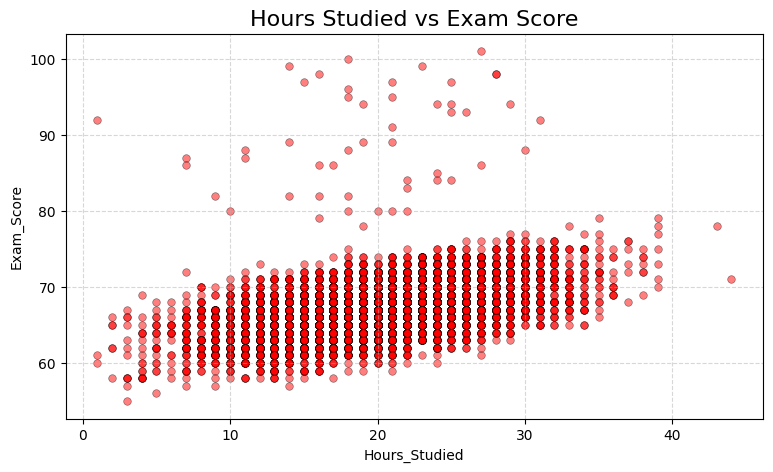

In [3]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df,x='Hours_Studied',y='Exam_Score',color='red',alpha=0.5,s=30,edgecolor='black')
plt.title('Hours Studied vs Exam Score',fontsize=16,weight='light')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()


### 4. Linear Regression on Hours

Linear Regression(Hours Only)
MAE value: 2.4635321113659105
MSE value: 10.7767536704778
RMSE value: 3.2827966233804067
R² value: 0.20219896593528708
Adjusted R² value: 0.2015945712125108


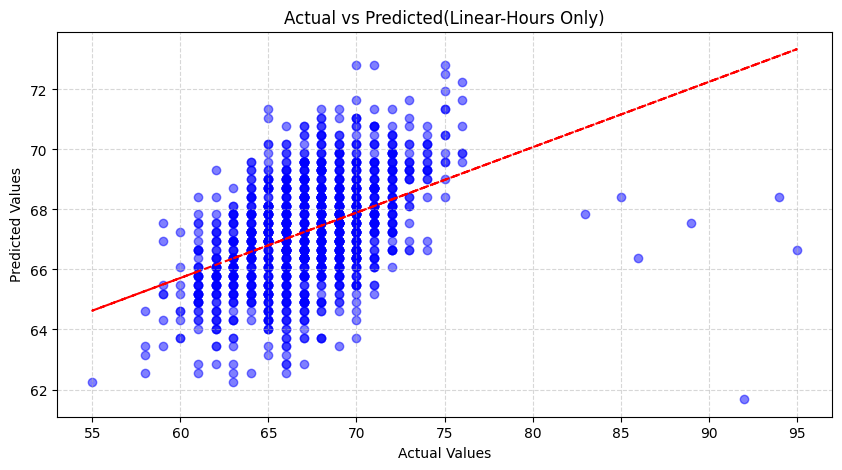

In [4]:
X=df[['Hours_Studied']]
y=df['Exam_Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

#Printing and plotting results of linear reg on hours now
print("Linear Regression(Hours Only)")
print("MAE value:",mae)
print("MSE value:",mse)
print("RMSE value:",rmse)
print("R² value:",r2)
print("Adjusted R² value:",adj_r2)
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,color='blue',alpha=0.5)
m,b=np.polyfit(y_test,y_pred,1)  #Fitting a line 
plt.plot(y_test,m*y_test+b,color='red',linestyle='--')
plt.title("Actual vs Predicted(Linear-Hours Only)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()


### 5. Polynomial Regression


Polynomial Regression (Degree=2)
MSE Value: 10.764148414539054
RMSE Value: 3.280876165681822
R² Value: 0.20313213064611568


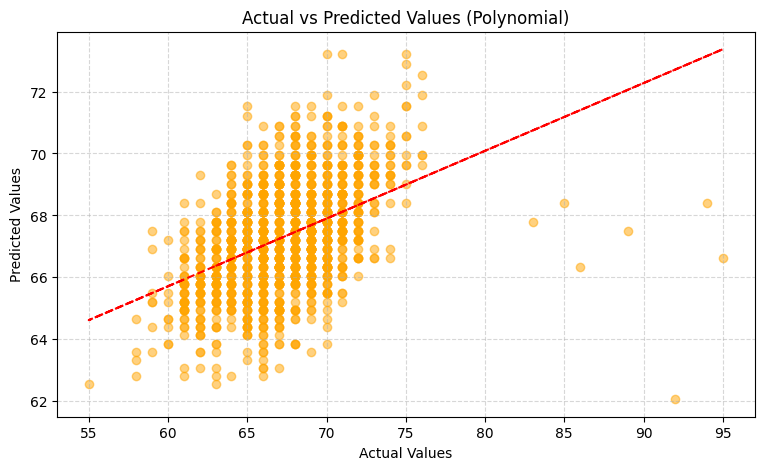

In [5]:
poly =PolynomialFeatures(degree=2)
X_poly =poly.fit_transform(X)
X_train_p,X_test_p,y_train_p,y_test_p=train_test_split(X_poly,y,test_size=0.2,random_state=43)
poly_model=LinearRegression()
poly_model.fit(X_train_p, y_train_p)
y_pred_poly=poly_model.predict(X_test_p)
mse_p=mean_squared_error(y_test_p,y_pred_poly)
r2_p=r2_score(y_test_p,y_pred_poly)
rmse_p=np.sqrt(mse_p)

#Printing and plotting results of polynomial regression on hours now
print("Polynomial Regression (Degree=2)")
print("MSE Value:",mse_p)
print("RMSE Value:",rmse_p)
print("R² Value:",r2_p)

plt.figure(figsize=(9,5))
plt.scatter(y_test_p, y_pred_poly,color='orange',alpha=0.5)
m,b=np.polyfit(y_test_p,y_pred_poly,1)
plt.plot(y_test_p,m*y_test_p+b,color='red',linestyle='--')
plt.title("Actual vs Predicted Values (Polynomial)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

### 6. Linear Regression with Extra Features

In [6]:
features=['Hours_Studied','Sleep_Hours','Previous_Scores','Motivation_Level']
X_full=df[features]
y=df['Exam_Score']
X_train_f,X_test_f,y_train_f,y_test_f=train_test_split(X_full,y,test_size=0.2,random_state=43)
model_full=LinearRegression()
model_full.fit(X_train_f,y_train_f)
y_pred_f=model_full.predict(X_test_f)
mse_f=mean_squared_error(y_test_f,y_pred_f)
rmse_f=np.sqrt(mse_f)
r2_f=r2_score(y_test_f,y_pred_f)

#Printing results now
print("Linear Regression (Multiple Features)")
print("MSE Value:",mse_f)
print("RMSE Value:",rmse_f)
print("R² Value:",r2_f)


Linear Regression (Multiple Features)
MSE Value: 10.257351394629895
RMSE Value: 3.2027100078886153
R² Value: 0.2406502180876111


### 7. Summarization of Comparison

In [7]:
print("Model Comparison Summary:")
print(f"Linear(Hours Only)→ R²:{r2:.4f}|RMSE:{rmse:.4f}")
print(f"Polynomial (Hours Only)→ R²:{r2_p:.4f}|RMSE:{rmse_p:.4f}")
print(f"Linear (Multiple Features)→ R²:{r2_f:.4f}|RMSE:{rmse_f:.4f}")


Model Comparison Summary:
Linear(Hours Only)→ R²:0.2022|RMSE:3.2828
Polynomial (Hours Only)→ R²:0.2031|RMSE:3.2809
Linear (Multiple Features)→ R²:0.2407|RMSE:3.2027
